In [19]:
from codes.python import load_database,ECG_denoising
from codes.python import QRS_detector
import numpy as np
from scipy import signal
from scipy.signal import savgol_filter
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from codes.python import heartbeat_segmentation as shs
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import pywt
from biosppy.signals import ecg
from sklearn import metrics
#import waipy
import operator
from codes.python import ecg_waveform_extractor as waveform
import time as system_time
from scipy import stats

In [2]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)

In [3]:
mit100 = load_database.load_patient_record("mitdb","100")
mit100.set_segmented_beats_r_pos(winL=100,winR=200)
filtere_MLII = mit100.filtered_MLII

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
Start segmenting records: 100
Filtered MLII records from : 100
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 100 completes.


In [5]:
mit100.set_Q_S_points_MLII()

Processing file: 100
Finding Q pos
Finding S pos
Done proecessing: 100


In [6]:
mit100.Q_points

array([   360,    653,    936, ..., 649223, 649475, 649724])

In [ ]:
mit100.S_points

In [7]:
index = list(range(0,10000))


In [8]:
r_peaks = shs.r_peak_detector(signal=filtere_MLII,annotations=mit100.annotations,indexes=index,  winL=180, winR=180,size_RR_max=5)
r_peaks = np.asarray(r_peaks)

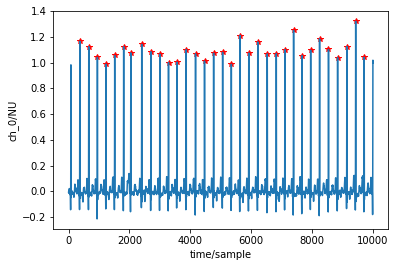

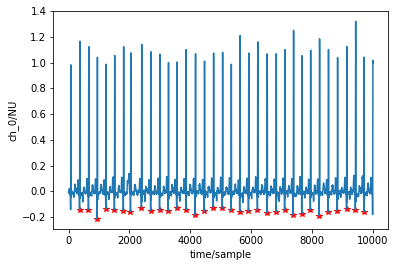

In [9]:
wfdb.plot_items(signal=filtere_MLII[index], ann_samp=[r_peaks])
time = np.asarray(mit100.time)
time = time[index]

q_points = shs.find_Q_point(signal=filtere_MLII[index],time=time, R_peaks=r_peaks, time_limit = 0.01,limit=50)

wfdb.plot_items(signal=filtere_MLII[index], ann_samp=[q_points])



In [10]:
start_time = system_time.time()
properties = waveform.r_peak_properties_extractor(mit100,to_area=False)
end_time = system_time.time()
print(end_time-start_time)

Patient file:  100 begins
Patient file:  100 processing end
4.0083324909210205


In [ ]:
properties

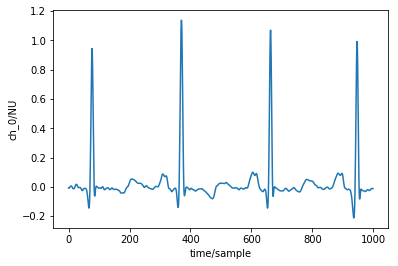

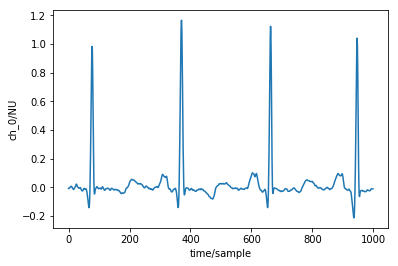

In [11]:
sav_sig = savgol_filter(filtere_MLII,17,4)
wfdb.plot_items(signal=sav_sig[0:1000])
wfdb.plot_items(signal=filtere_MLII[0:1000])




In [16]:
z_score = stats.zscore(filtere_MLII)

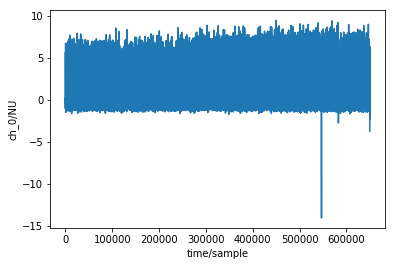

In [17]:
wfdb.plot_items(signal=z_score)


ValueError: Expected 2D array, got 1D array instead:
array=[-0.00788602 -0.00915605 -0.00836135 ... -0.4320437  -0.58257829
 -0.59030697].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.